In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter


FILE_PATH = "sampled_NF-CSE-CIC-IDS2018-v2.csv"

# Load the dataset directly into a DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mohamedelrifai/network-anomaly-detection-dataset",
    FILE_PATH,
)

# Display the first 5 records
print("First 5 records:")
df.head().T

<ipython-input-1-909b54669903>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:


,0,1,2,3,4
IPV4_SRC_ADDR,172.31.65.84,116.11.32.121,5.188.9.25,212.92.117.95,172.31.65.40
L4_SRC_PORT,53272,6753,53238,51202,56305
IPV4_DST_ADDR,31.13.65.7,172.31.67.34,172.31.64.86,172.31.67.120,172.31.0.2
L4_DST_PORT,443,3389,3336,3389,53
PROTOCOL,6,6,6,6,17
L7_PROTO,91.119,0.0,0.0,0.0,0.0
IN_BYTES,2330,1476,40,1476,58
IN_PKTS,32,8,1,8,1
OUT_BYTES,34432,1869,0,1873,262
OUT_PKTS,41,7,0,7,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188938 entries, 0 to 188937
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IPV4_SRC_ADDR                188938 non-null  object 
 1   L4_SRC_PORT                  188938 non-null  int64  
 2   IPV4_DST_ADDR                188938 non-null  object 
 3   L4_DST_PORT                  188938 non-null  int64  
 4   PROTOCOL                     188938 non-null  int64  
 5   L7_PROTO                     188938 non-null  float64
 6   IN_BYTES                     188938 non-null  int64  
 7   IN_PKTS                      188938 non-null  int64  
 8   OUT_BYTES                    188938 non-null  int64  
 9   OUT_PKTS                     188938 non-null  int64  
 10  TCP_FLAGS                    188938 non-null  int64  
 11  CLIENT_TCP_FLAGS             188938 non-null  int64  
 12  SERVER_TCP_FLAGS             188938 non-null  int64  
 13 

In [ ]:
df.shape

(188938, 46)

In [ ]:
df.drop(columns=['Attack_Category', 'Attack'], inplace=True)

In [ ]:
# Drop all categerical columns
df = df.select_dtypes(exclude=['object'])
categorical_cols = [
    'L4_SRC_PORT', 'L4_DST_PORT',
    'PROTOCOL', 'L7_PROTO',
    'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
    'ICMP_TYPE', 'ICMP_IPV4_TYPE',
    'DNS_QUERY_ID', 'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER',
    'FTP_COMMAND_RET_CODE'
]
df.drop(columns=categorical_cols, inplace=True)
df.columns

Index(['IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'Label'],
      dtype='object')

_______

[Multivariate Model Implementation with Python](https://towardsdatascience.com/the-basics-of-anomaly-detection-65aff59949b7/) <br>
[Modern Anomaly and Novelty Detection: Exercise - Session 8](https://www.youtube.com/watch?v=n6oTSYXYhaM&list=PLB1nTQo4_y6thcPxdDG_MifQqSMcAq1qv&index=8)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y = df['Label']
X = df.drop(columns=['Label'])

print(X.shape)
print(y.shape)

(188938, 28)
(188938,)


In [ ]:
# Apply log transformation to the column (log(x + 1) to handle 0 values)
X['SRC_TO_DST_SECOND_BYTES'] = np.log1p(X['SRC_TO_DST_SECOND_BYTES'])

In [ ]:
# --- Split based on label ---
X_normal = X[y == 0]
X_outliers = X[y == 1]

print(X_normal.shape)
print(X_outliers.shape)

(166356, 28)
(22582, 28)


In [ ]:
# Feature scaling should be done AFTER splitting to avoid data leakage
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features using only training data statistics
print("Scaling features (using only training data)...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training, transform training
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test data
print("Features scaled successfully.")


Splitting data into training and testing sets...
Scaling features (using only training data)...
Features scaled successfully.


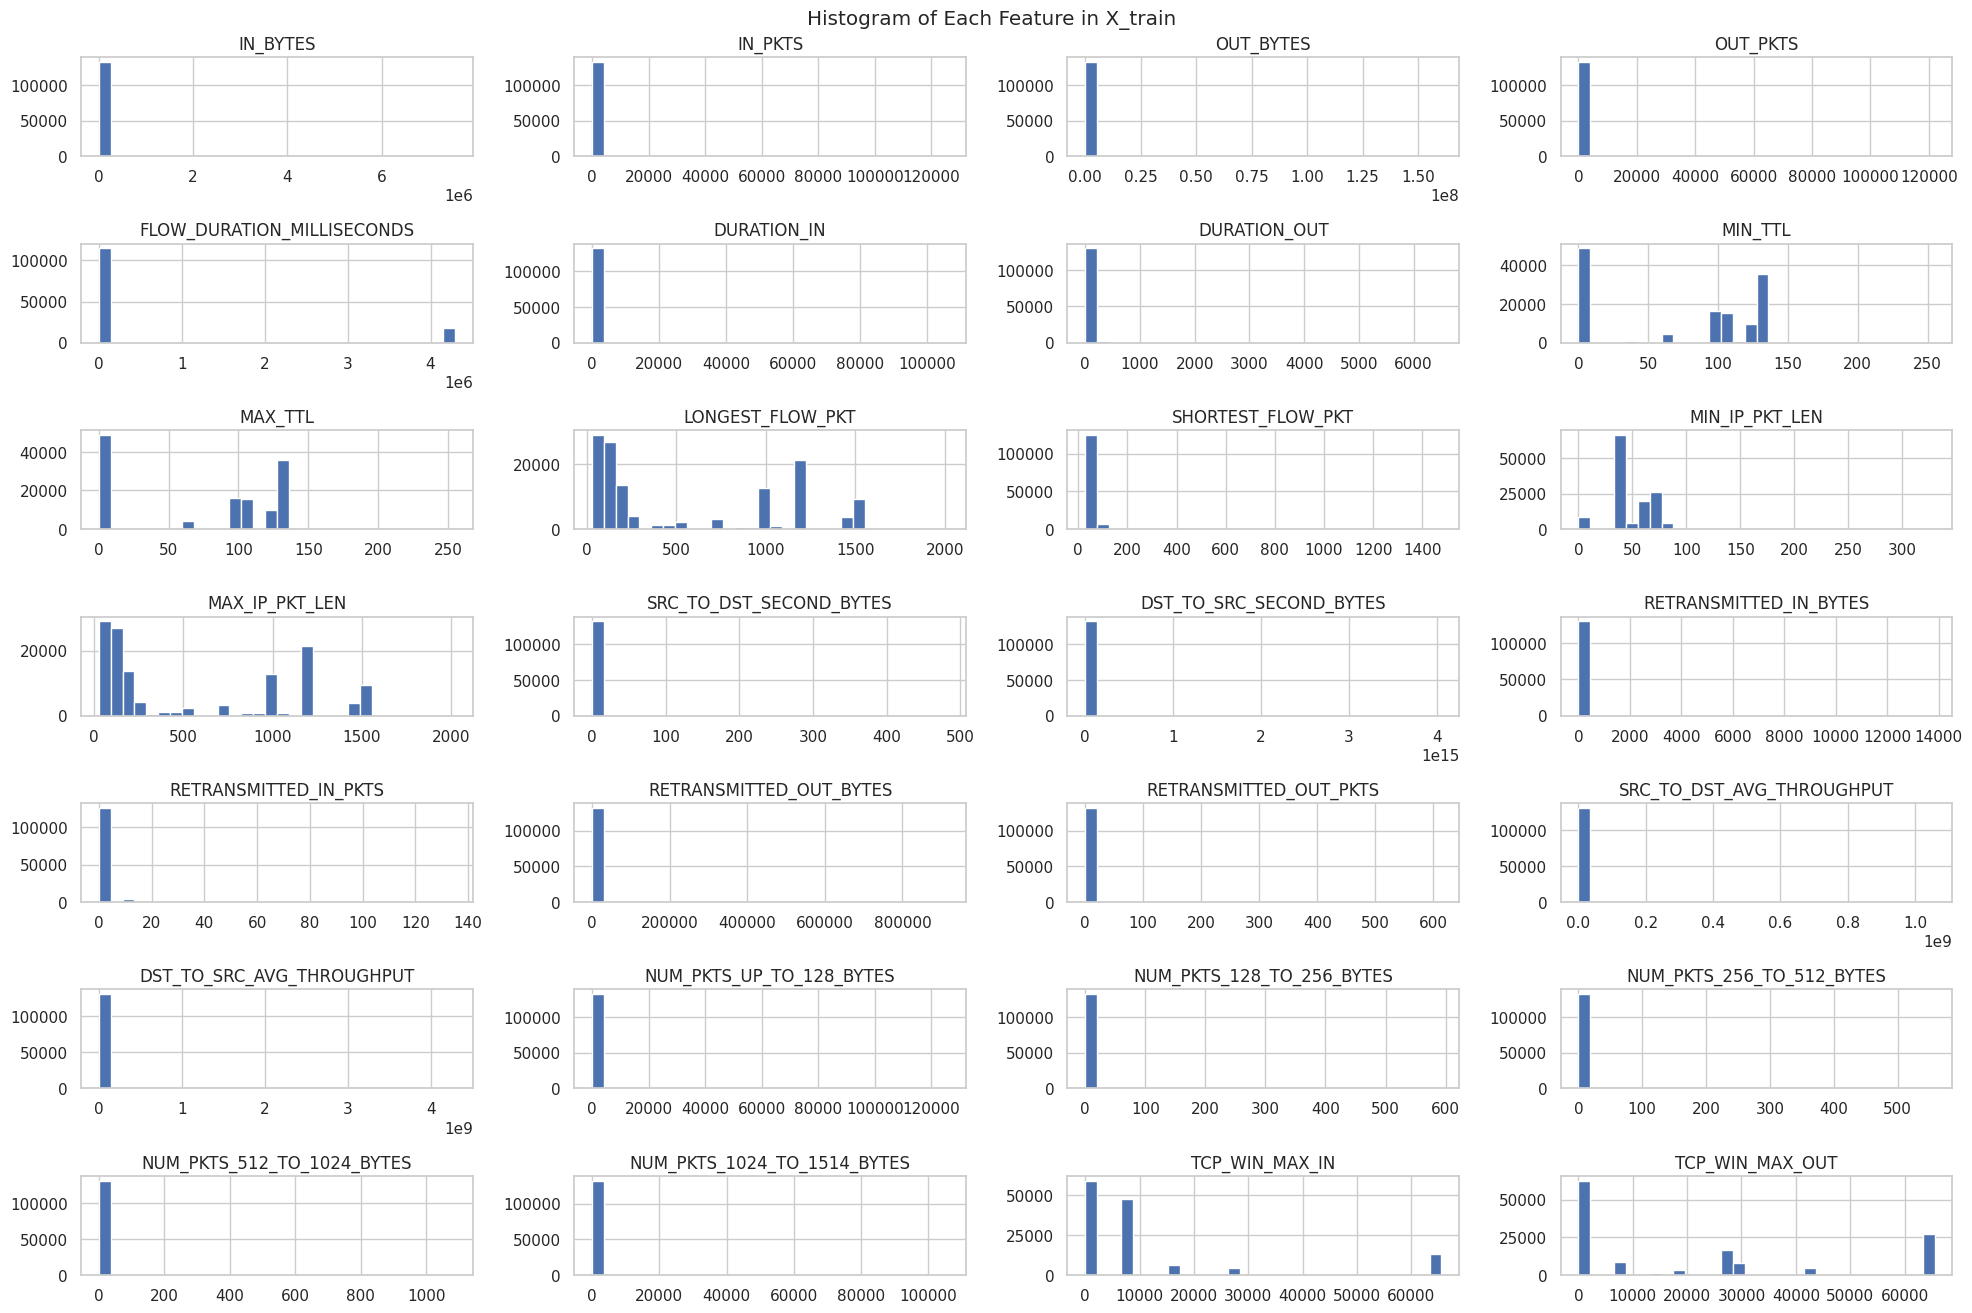

In [ ]:
# Check histogram for each column in X_train to make sure that it follows normal dist
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot histograms for each column
X_train.hist(bins=30, figsize=(20, 15), layout=(int(len(X_train.columns)/4) + 1, 4))
plt.suptitle("Histogram of Each Feature in X_train")
plt.tight_layout()
plt.show()


In [ ]:
# Determine optimal number of components using BIC criteria
n_components_range = range(1, 15)
bic_scores = []

print("Finding optimal number of components...")
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_train_scaled)
    bic_scores.append(gmm.bic(X_train_scaled))

optimal_n_components = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of components: {optimal_n_components}")

Finding optimal number of components...
Optimal number of components: 14


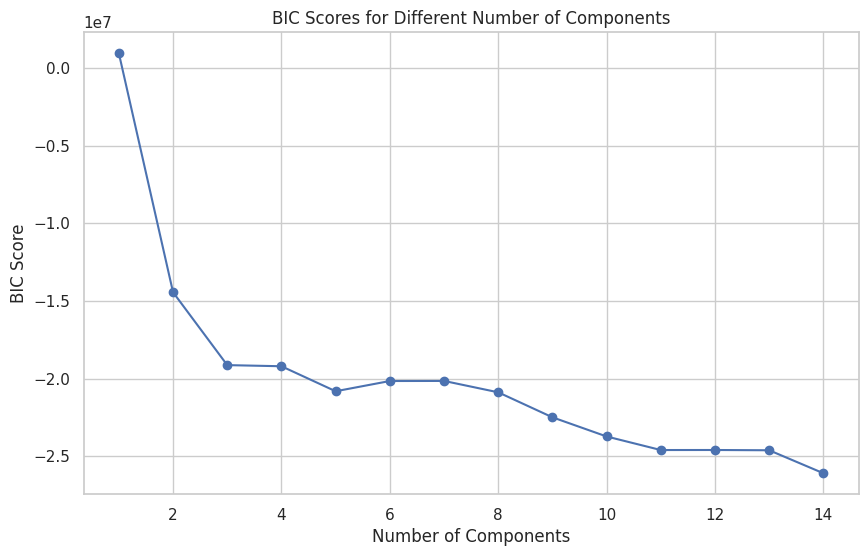

In [ ]:
# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Different Number of Components')
plt.grid(True)
#plt.savefig('gmm_bic_scores.png')
plt.show()
#print("BIC scores plot saved to 'gmm_bic_scores.png'")

In [ ]:
optimal_n_components = 10
# Train GMM with optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, random_state=42)
gmm.fit(X_train_scaled)
print("GMM model trained successfully.")

GMM model trained successfully.


In [ ]:
from sklearn.metrics import classification_report
import numpy as np




In [ ]:
# Step 4: Anomaly detection using GMM
print("\nStep 4: Performing anomaly detection...")

# Calculate log likelihood for each sample
train_log_likelihood = gmm.score_samples(X_train_scaled)
test_log_likelihood = gmm.score_samples(X_test_scaled)

# Find the best threshold using ROC curve on training data
fpr_train, tpr_train, thresholds_roc = roc_curve(y_train, -train_log_likelihood)
optimal_idx = np.argmax(tpr_train - fpr_train)
optimal_threshold = -thresholds_roc[optimal_idx]

print(f"Optimal threshold based on ROC curve: {optimal_threshold:.3f}")

# We'll use the ROC-based threshold for predictions
threshold = optimal_threshold

# Predict anomalies
train_predictions = (train_log_likelihood < threshold).astype(int)
test_predictions = (test_log_likelihood < threshold).astype(int)


Step 4: Performing anomaly detection...
Optimal threshold based on ROC curve: 54.768


In [ ]:
# Step 5: Evaluate the model
print("\nStep 5: Evaluating the model...")

# Classification report
print("\nClassification Report (Training Set):")
print(classification_report(y_train, train_predictions))


Step 5: Evaluating the model...

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    116458
           1       0.60      0.88      0.71     15798

    accuracy                           0.92    132256
   macro avg       0.79      0.90      0.83    132256
weighted avg       0.94      0.92      0.92    132256



In [ ]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_predictions))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     49898
           1       0.61      0.88      0.72      6784

    accuracy                           0.92     56682
   macro avg       0.80      0.90      0.84     56682
weighted avg       0.94      0.92      0.92     56682



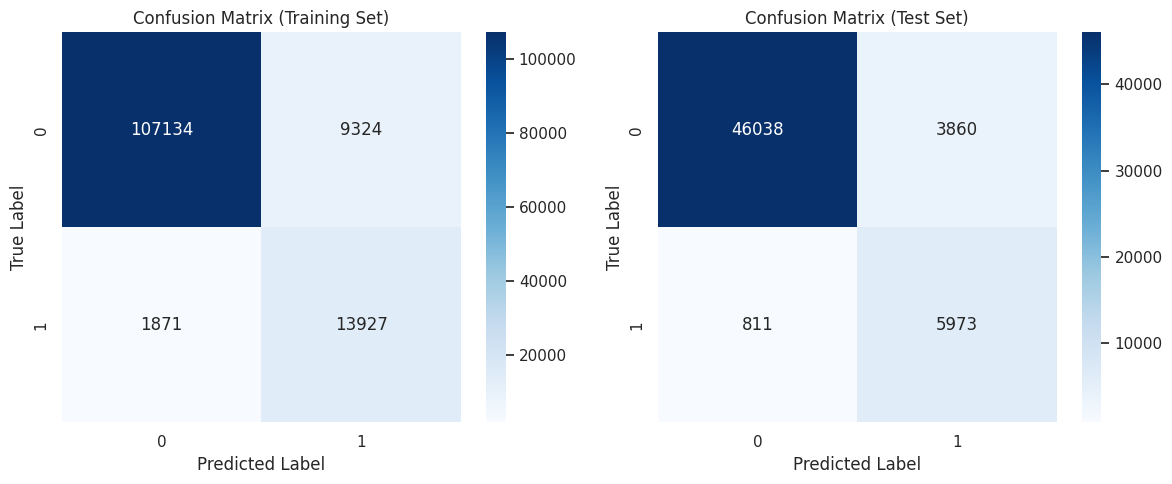

In [ ]:
# Confusion matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_train = confusion_matrix(y_train, train_predictions)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
cm_test = confusion_matrix(y_test, test_predictions)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
#plt.savefig('gmm_confusion_matrices.png')
plt.show()
#print("Confusion matrices saved to 'gmm_confusion_matrices.png'")

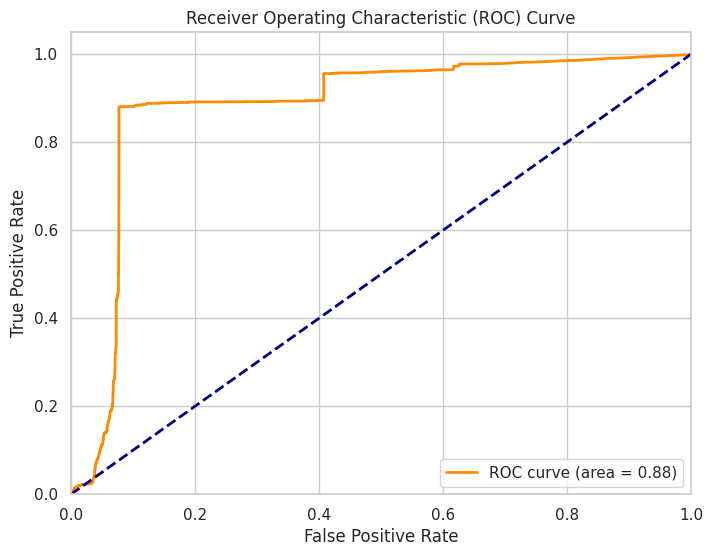

In [ ]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, -test_log_likelihood)  # negative because lower log-likelihood indicates anomaly
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
#plt.savefig('gmm_roc_curve.png')
plt.show()
#print("ROC curve saved to 'gmm_roc_curve.png'")

______________